# Problem 1: Open-ended ML optimization (20%)

In [2]:
import numpy as np
import pandas as pd
%pylab inline

np.random.seed(1234)

Populating the interactive namespace from numpy and matplotlib


## The moons dataset
Recall our moons dataset. Here we will see how well we can do with a decision tree on it. 

## Steps:
 - ### Generate the data
 - ### split it into 80/20 train/tess
 - ### Do a grid search to find the best parameters
 - ### Re-train with the best parameters
 - ### Evaluate performance on the test set (you should be able to get above 83% accuracy)

Text(0.5,1,'Fake Classification Data')

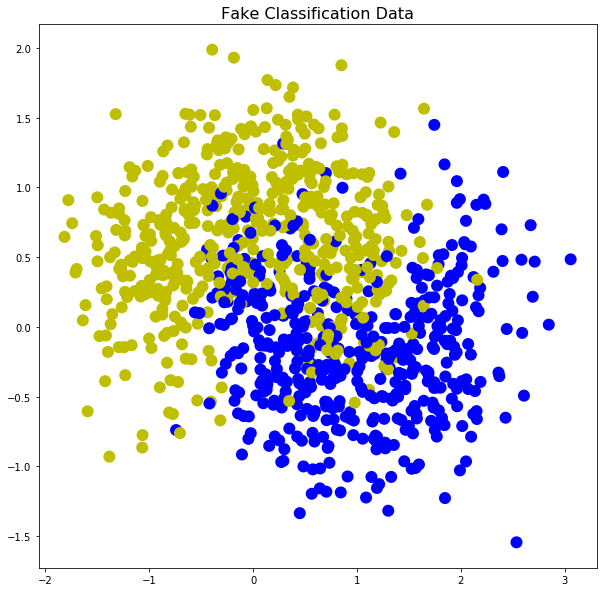

In [3]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
Xm, ym = make_moons(n_samples=50000, noise=0.4, random_state=53)

plt.figure(figsize=(10,10))
colors=['b' if y == 1 else 'y' for y in ym[:1000]]
plt.scatter(Xm[:1000, 0], Xm[:1000, 1], c=colors, linewidths=6)
plt.title('Fake Classification Data', fontsize=16)

In [4]:
# code goes here
# Split data into 80-20
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=42)

In [5]:
# Do grid search to find best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(Xm_train, ym_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   43.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, ve

In [7]:
#Evaluate performance on test set
y_pred = grid_search_cv.predict(Xm_test)
from sklearn.metrics import accuracy_score
accuracy_score(ym_test, y_pred)

0.8577

# Problem 2: The XOR Gate Revisted (20%)
## In this problem we'll explore the xor gate when we add noise to it and examine the decision boundary.

In [8]:
import numpy as np
import pandas as pd
%pylab inline

np.random.seed(1234)

from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\shunl\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Part 0: Generate data
 - ### Generate 2000 points of two dimensional random data (`X.shape` should be `(2000,2)`)
 - ### Compute `y_xor`

In [9]:
x = np.random.rand(2000, 2) > 0.5
y_xor = np.logical_xor(x[:, 0], x[:, 1])

## Part 1: Fit two classifiers
 - ### Partition the data into train and test
 - ### Fit both logistic regression and a single decision tree to the `x_or` data.
 - ### Compute the accuracy out of sample for each model
 - ### Make a plot of the decision boundary (NB see the class notes for help) and comment on what you see

In [19]:
#Partition data into train and set
x_train, x_test, yxor_train, yxor_test = train_test_split(x, y_xor, test_size = 0.2, random_state = 42)
#Generate y_or
y_or = np.logical_or(x[:, 0], x[:, 1])
#Fit logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, yxor_train)
accuracy_score_log = accuracy_score(yxor_test, lr.predict(x_test))

#Fit single decision tree
dt1= DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt1.fit(x_train, yxor_train)
accuracy_score_dt = accuracy_score(yxor_test, dt1.predict(x_test))
print("Accuracy Scores:" + "\n" + "Logistic Regression:" + str(accuracy_score_log) + "\n" + "Single Decision Tree:" + str(accuracy_score_dt))


Accuracy Scores:
Logistic Regression:0.205
Single Decision Tree:0.4675


In [20]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", )
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", )
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

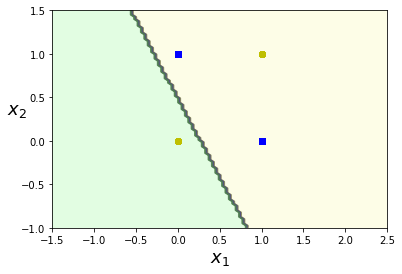

In [21]:
#decision boundary for logistic regression
plot_decision_boundary(lr, x_test, yxor_test, axes=[-1.5, 2.5, -1, 1.5])

C:\Users\shunl\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


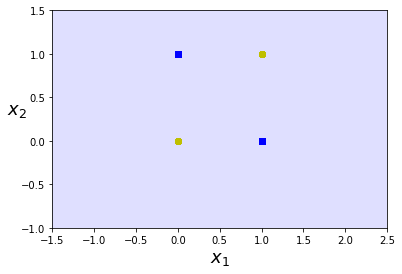

In [23]:
#decision boundary for decision tree
plot_decision_boundary(dt1, x_test, yxor_test, axes=[-1.5, 2.5, -1, 1.5])

In [7]:
# PUT COMMENTS HERE 
# The logistic regression clearly is limited in predicting this kind of data as it cannot slice well to include both points.
# The single decision tree model is more accurate than logistic regression model.

## Part 2: Add Noise
 - ### Add a small amount of random normal noise to both dimensions of X
 - ### Find what "small" is by plotting the data and making sure the clusters don't overlap
 - ### Repeat fitting both a decision tree and logistic regression to the data
 - ### Compute the out of sample accuracies.
 - ### Plot the decision boundaries and comment on the results

In [25]:
x_noisy = x + 0.05 * np.random.randn(x.shape[0], x.shape[1])

Text(0.5,1,'Check Clusters Do Not Overlap')

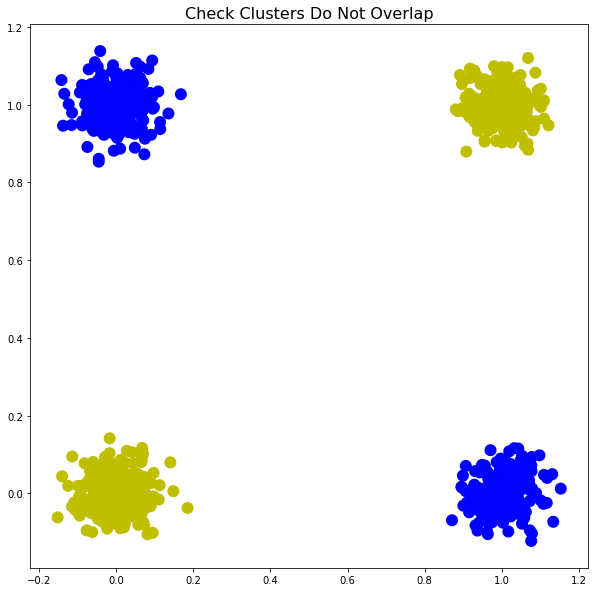

In [26]:
# make some plots
# check clusters don't overlap
plt.figure(figsize=(10,10))
colors=['b' if y == 1 else 'y' for y in y_xor[:1000]]
plt.scatter(x_noisy[:1000, 0], x_noisy[:1000, 1], c=colors, linewidths=6)
plt.title('Check Clusters Do Not Overlap', fontsize=16)

In [30]:
x_noisy_train, x_noisy_test, y_noisy_train, y_noisy_test = train_test_split(x_noisy, y_xor, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(x_noisy_train, y_noisy_train)
accuracy_score_log = accuracy_score(y_noisy_test, lr.predict(x_noisy_test))

dt1= DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt1.fit(x_noisy_train, y_noisy_train)
accuracy_score_dt = accuracy_score(y_noisy_test, dt1.predict(x_noisy_test))

print("Accuracy Scores:" + "\n" + "Logistic Regression:" + str(accuracy_score_log) + "\n" + "Single Decision Tree:" + str(accuracy_score_dt))


Accuracy Scores:
Logistic Regression:0.205
Single Decision Tree:0.4675


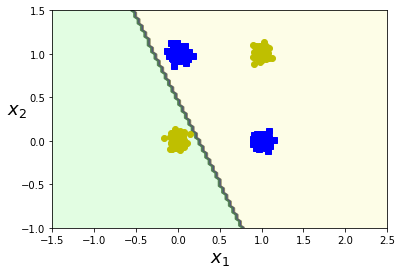

In [28]:
plot_decision_boundary(lr, x_noisy_test, y_noisy_test, axes=[-1.5, 2.5, -1, 1.5])


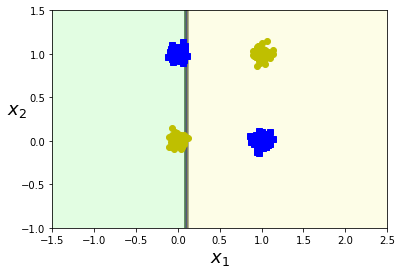

In [40]:
plot_decision_boundary(dt1, x_noisy_test, y_noisy_test, axes=[-1.5, 2.5, -1, 1.5])

In [10]:
# PUT COMMENTS HERE!
# Accuracy scores of both models are not much different from the ones in no-noise case.
# When clusters have noise but do not overlap, there is little difference from the no-noise scenario.

## Part 3: Add More Noise!
 - ### Add more noise to the point where the clusters slightly overlap
 - ### Fit THREE models: an unrestricted decision tree, a regularized tree, and logistic regression
 - ### Compute the out of sample accuracies.
 - ### Plot the decision boundaries and comment on the results

In [55]:
x_noisy = x + 0.25 * np.random.randn(x.shape[0], x.shape[1])
x_noisy_train, x_noisy_test, y_noisy_train, y_noisy_test = train_test_split(x_noisy, y_xor, test_size=0.2, random_state=42)

lr_noisy = LogisticRegression(C=1e3)
# add code here
lr_noisy.fit(x_noisy_train, y_noisy_train)
accuracy_score_log = accuracy_score(y_noisy_test, lr.predict(x_noisy_test))

dt_noisy = DecisionTreeClassifier()
# add code here
dt_noisy.fit(x_noisy_train, y_noisy_train)
accuracy_score_dt = accuracy_score(y_noisy_test, dt_noisy.predict(x_noisy_test))

# add more code for restricted tree
dt_noisy_restricted = DecisionTreeClassifier(min_samples_leaf=4)
dt_noisy_restricted.fit(x_noisy_train, y_noisy_train)
accuracy_score_dt_restricted = accuracy_score(y_noisy_test, dt_noisy_restricted.predict(x_noisy_test))

print("Accuracy Scores:" + "\n" + "Logistic Regression:" + str(accuracy_score_log) + "\n" + "Decision Tree Unrestricted:" + str(accuracy_score_dt) + "\n" + "Decision Tree Restricted:" + str(accuracy_score_dt_restricted))



Accuracy Scores:
Logistic Regression:0.31
Decision Tree Unrestricted:0.955
Decision Tree Restricted:0.965


C:\Users\huang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


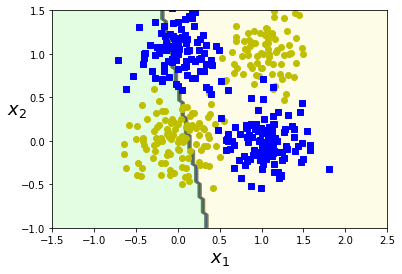

In [56]:
# plotting code here
#Logistic Regression
plot_decision_boundary(lr_noisy, x_noisy_test, y_noisy_test, axes=[-1.5, 2.5, -1, 1.5])

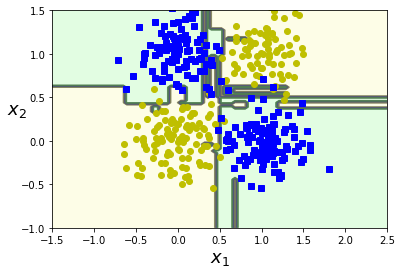

In [57]:
# Unrestricted Tree
plot_decision_boundary(dt_noisy, x_noisy_test, y_noisy_test, axes=[-1.5, 2.5, -1, 1.5])

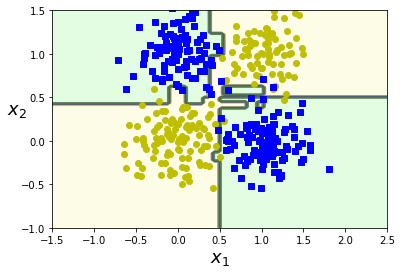

In [58]:
# Restricted Tree
plot_decision_boundary(dt_noisy_restricted, x_noisy_test, y_noisy_test, axes=[-1.5, 2.5, -1, 1.5])

In [ ]:
# COMMENTS
# The advantage of decision tree models is more obvious when noise is heavy, as from the accuracy scores ---
# The accuracy scores of decision tree models are vastly higher than logistic regression's
# By restricting the minimum number of samples of each leaf, we get neater 'slicing' at small cost on accuracy